## 깨진 문자열 복구

In [28]:
broken_text = "�հ�ݾװ� ��ϱ� �߰�"

In [29]:
broken_text.encode("utf-8").decode("euc-kr")

UnicodeDecodeError: 'euc_kr' codec can't decode byte 0xbd in position 14: illegal multibyte sequence

In [ ]:
%pip install chardet

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import chardet

with open("broken_text.txt", "rb") as f:
    raw_data = f.read()

encoding = chardet.detect(raw_data)
encoding

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

In [ ]:
%pip install ftfy

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from ftfy import fix_text

fix_text(broken_text)

'�հ�ݾװ� ��ϱ� �߰�'

In [ ]:
broken_text = '�հ�ݾװ� ��ϱ� �߰�'

broken_text.encode("utf-8").decode("euc-kr", errors="ignore")

'占쌌곤옙附陋占 占쏙옙歐占 占쌩곤옙'

## 하드코딩 분석을 위한 데이터 분석

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

share1 = pd.read_csv("data/shareQuery1.csv")
share2 = pd.read_csv("data/shareQuery2.csv")

### share1

In [43]:
share1["diff"] = share1["total_charge"] - share1["deduct_charge"]
share1

,total_charge,deduct_charge,diff
0,748000,248000,500000
1,745500,245500,500000
2,743000,243000,500000
3,740500,240500,500000
4,738000,238000,500000
...,...,...,...
427,1356600,356600,1000000
428,1344200,344200,1000000
429,1331800,331800,1000000
430,1319400,319400,1000000


In [30]:
share1.sort_values(by="total_charge")

,total_charge,deduct_charge,diff
251,621000,121000,500000
35,624000,124000,500000
250,625900,125900,500000
34,628900,128900,500000
249,630900,130900,500000
...,...,...,...
182,1607600,607600,1000000
397,1610800,610800,1000000
181,1613800,613800,1000000
396,1617000,617000,1000000


In [39]:
share1.loc[share1["diff"] == 500000]["total_charge"].max()

np.int64(872000)

In [40]:
share1.loc[share1["diff"] == 1000000]["total_charge"].max()

np.int64(1620000)

<Axes: xlabel='total_charge', ylabel='deduct_charge'>

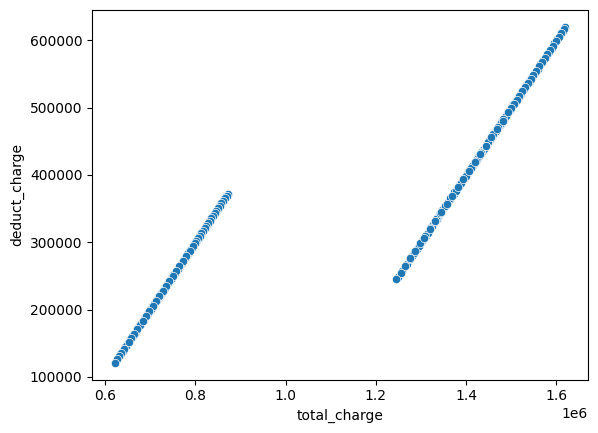

In [23]:
sns.scatterplot(x="total_charge", y="deduct_charge", data=share1)

<Axes: xlabel='total_charge', ylabel='diff'>

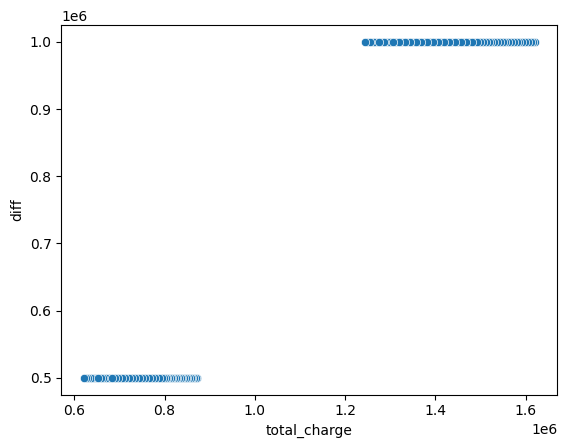

In [36]:
sns.scatterplot(data=share1, x="total_charge", y="diff")

<Axes: xlabel='diff', ylabel='Count'>

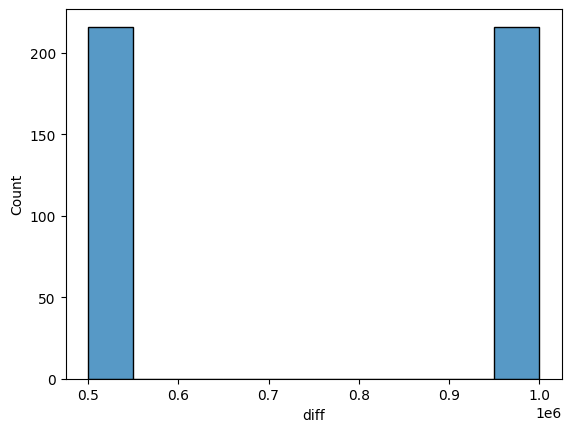

In [25]:
sns.histplot(data=share1, x="diff")

### share2

In [44]:
share2.sort_values(by="total_charge")

,total_charge,apply_charge
250,621000,500000
34,624000,500000
249,625900,500000
33,628900,500000
248,630900,500000
...,...,...
181,1607600,1000000
396,1610800,1000000
180,1613800,1000000
395,1617000,1000000


<Axes: xlabel='total_charge', ylabel='apply_charge'>

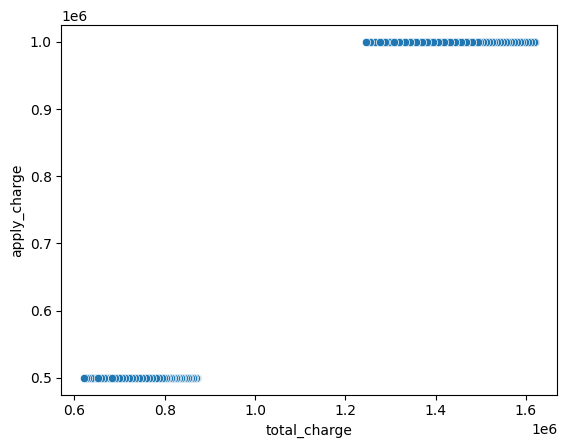

In [45]:
sns.scatterplot(x="total_charge", y="apply_charge", data=share2)

In [63]:
mix_df = pd.merge(left=share1, right=share2, on="total_charge", how="outer").sort_values(by="total_charge").reset_index(drop=True)
mix_df

,total_charge,deduct_charge,diff,apply_charge
0,621000,121000,500000,500000
1,624000,124000,500000,500000
2,625900,125900,500000,500000
3,628900,128900,500000,500000
4,630900,130900,500000,500000
...,...,...,...,...
553,1607600,607600,1000000,1000000
554,1610800,610800,1000000,1000000
555,1613800,613800,1000000,1000000
556,1617000,617000,1000000,1000000


In [64]:
mix_df.loc[mix_df["deduct_charge"].isnull()]

,total_charge,deduct_charge,diff,apply_charge


In [65]:
mix_df.loc[mix_df["apply_charge"].isnull()]

,total_charge,deduct_charge,diff,apply_charge


In [66]:
mix_df.loc[mix_df["diff"] != mix_df["apply_charge"]]

,total_charge,deduct_charge,diff,apply_charge
